In [42]:
#polynomial regression
# Polynomial Regression where polynomial regression is a type of linear regression applied when the data 
# is not exactly linear and certain curve occurs
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
df = pd.read_csv('dataset/Position_Salaries.csv')

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [50]:
#here level is independent variable and salary is dependent
features = df.iloc[:,1].values.reshape(-1, 1)
features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [54]:
label = df.iloc[:,df.columns == "Salary"].values.reshape(-1, 1)
label

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

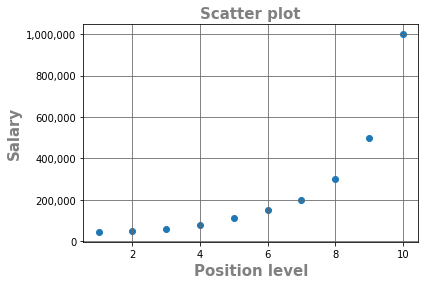

In [56]:
# # Lets plot these data
from pylab import *
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#this two lines is for y axis is automatically formated to exponentioal form to avoid this

plt.scatter(features,label)
plt.title('Scatter plot', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Position level', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Salary', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

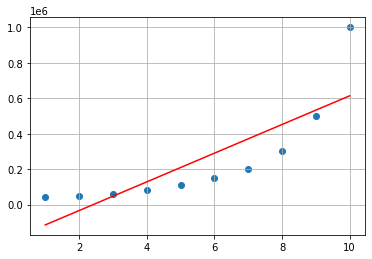

In [59]:
#we can observe that the above data is non-linear and slightly curved
#to predict these datas we need to use polynomial regression
#before going to polynomial regression lets see whter linear regression fits or not
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(features,label)
linpred = linreg.predict(features)

plt.scatter(features,label)
plt.plot(features,linpred,color="red")
plt.grid()
plt.show()


In [61]:
#here we just apply regression not train 
#now we can clearly say the line is not fit and the linear regression is not fit and not applicable
print("The R2 score for this model is",r2_score(label,linpred))  #66% occuracy

The R2 score for this model is 0.6690412331929895


In [93]:
#polynomiaal regression
from sklearn.preprocessing import PolynomialFeatures
# degree = int(input("Enter degree : \n"))  #degree represents cupic,parabolic,quadratic curve
def create_polynomial_regression_model(degree):
    polyreg = PolynomialFeatures(degree=degree)
    X_poly = polyreg.fit_transform(features)
    
    linreg = LinearRegression()
    linreg.fit(X_poly,label)
    
    #plotting
    plt.scatter(features,label)
    plt.plot(features,linreg.predict(X_poly),color="red")
    plt.show()

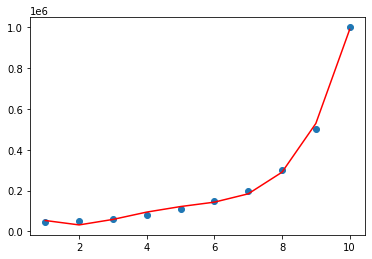

In [94]:
create_polynomial_regression_model(4)

In [77]:
# It is quite clear from the plot that the quadratic curve is able to fit the 
# data scatter than the linear line.

In [95]:
# Computing the RMSE and 𝑅2
from sklearn.metrics import mean_squared_error, r2_score

entry_degree = int(input('Enter Degree: \n'))
polynomial_features= PolynomialFeatures(entry_degree)
x_poly = polynomial_features.fit_transform(features)

model = LinearRegression()
model.fit(x_poly, label)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(label,y_poly_pred))
r2 = r2_score(label,y_poly_pred)
print('The RMSE of the polynomial regression model is:',rmse)
print('The R2 score of the polynomial regression model is:',r2)  #99% occuracy

Enter Degree: 
4
The RMSE of the polynomial regression model is: 14503.234909626593
The R2 score of the polynomial regression model is: 0.9973922891706615


In [106]:
# Predicting a new result with Linear Regression
# test_X1 = np.array(6.5).reshape(-1, 1)
# linreg.predict(test_X1)

In [103]:
# Predicting a new result with Polynomial Regression
test_X2 = np.array(6.5).reshape(-1, 1)
model.predict(polynomial_features.fit_transform(test_X2))

array([[158862.45265155]])